In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [129]:
events_data_test = pd.read_csv('events_data_test.csv')

In [130]:
events_data_test.head()

,step_id,timestamp,action,user_id
0,30456,1526893787,viewed,24417
1,30456,1526893797,viewed,24417
2,30456,1526893954,viewed,24417
3,30456,1526895780,viewed,24417
4,30456,1526893787,discovered,24417


In [131]:
events_data_test.step_id.nunique()

198

In [132]:
submission_data_test = pd.read_csv('submission_data_test.csv')

In [133]:
submission_data_test.head()

,step_id,timestamp,submission_status,user_id
0,31971,1526800961,wrong,24370
1,31971,1526800976,wrong,24370
2,31971,1526800993,wrong,24370
3,31971,1526801054,correct,24370
4,31972,1526800664,wrong,24370


In [134]:
submission_data_test.user_id.nunique()

2803

In [135]:
users_event_data = events_data_test.pivot_table(index='user_id', 
                       columns='action', 
                       values='step_id', 
                       aggfunc='count', 
                       fill_value=0).reset_index()

In [136]:
users_event_data.head()

action,user_id,discovered,passed,started_attempt,viewed
0,4,1,1,0,1
1,6,1,1,0,1
2,10,2,2,0,6
3,12,11,9,4,14
4,13,70,70,35,105


In [137]:
users_event_data.user_id.nunique()

6184

In [138]:
users_scores = submission_data_test.pivot_table(index='user_id', 
                       columns='submission_status', 
                       values='step_id', 
                       aggfunc='count', 
                       fill_value=0).reset_index()

In [139]:
users_scores.head()

submission_status,user_id,correct,wrong
0,12,1,0
1,13,29,36
2,15,10,30
3,21,24,103
4,35,7,35


In [140]:
users_scores.user_id.nunique()

2803

In [141]:
users_data = users_event_data.merge(users_scores, how='outer')

In [142]:
users_data = users_data.fillna(0)

In [143]:
users_data.head()

,user_id,discovered,passed,started_attempt,viewed,correct,wrong
0,4,1,1,0,1,0.0,0.0
1,6,1,1,0,1,0.0,0.0
2,10,2,2,0,6,0.0,0.0
3,12,11,9,4,14,1.0,0.0
4,13,70,70,35,105,29.0,36.0


In [25]:
users_data.shape

(6184, 7)

In [26]:
users_data["passed_course"] = users_data.passed > 40

In [28]:
users_data.groupby('passed_course').count()

,user_id,discovered,passed,started_attempt,viewed,correct,wrong
passed_course,,,,,,,
False,5816,5816,5816,5816,5816,5816,5816
True,368,368,368,368,368,368,368


In [29]:
368/(368+5816)

0.059508408796895215

In [144]:
steps_tried = submission_data_test.groupby('user_id').step_id.nunique().to_frame().reset_index().rename(columns={'step_id': 'steps_tried'})

In [145]:
steps_tried.head()

,user_id,steps_tried
0,12,1
1,13,29
2,15,11
3,21,30
4,35,9


In [146]:
users_data = users_data.merge(steps_tried, on='user_id', how='outer')

In [147]:
users_data = users_data.fillna(0)

In [148]:
users_data.head()

,user_id,discovered,passed,started_attempt,viewed,correct,wrong,steps_tried
0,4,1,1,0,1,0.0,0.0,0.0
1,6,1,1,0,1,0.0,0.0,0.0
2,10,2,2,0,6,0.0,0.0,0.0
3,12,11,9,4,14,1.0,0.0,1.0
4,13,70,70,35,105,29.0,36.0,29.0


In [150]:
X_test = users_data

In [85]:
X_test = users_data.merge(X, on='user_id', how='outer')

In [93]:
X_test = X_test.set_index(X_test.user_id)
X_test = X_test.drop('user_id', axis=1)

In [151]:
X_test['correct_ratio'] = X_test.correct / (X_test.correct + X_test.wrong)

In [153]:
submission_data_test["date"] = pd.to_datetime(submission_data_test.timestamp, unit='s')
submission_data_test["day"] = submission_data_test.date.dt.date

In [154]:
X = submission_data_test.groupby('user_id').day.nunique().to_frame().reset_index().rename(columns={'day': 'unique_days'})

In [156]:
X_test = X_test.merge(X, on='user_id', how='outer')

In [157]:
X_test.head()

,user_id,discovered,passed,started_attempt,viewed,correct,wrong,steps_tried,correct_ratio,unique_days
0,4,1,1,0,1,0.0,0.0,0.0,NaN,NaN
1,6,1,1,0,1,0.0,0.0,0.0,NaN,NaN
2,10,2,2,0,6,0.0,0.0,0.0,NaN,NaN
3,12,11,9,4,14,1.0,0.0,1.0,1.000000,1.0
4,13,70,70,35,105,29.0,36.0,29.0,0.446154,2.0


In [155]:
X.head()

,user_id,unique_days
0,12,1
1,13,2
2,15,3
3,21,1
4,35,3


In [104]:
X_test.shape

(6184, 5)

In [113]:
users_data.head()

,user_id,discovered,passed,started_attempt,viewed,correct,wrong,passed_course,steps_tried
0,4,1,1,0,1,0.0,0.0,False,0.0
1,6,1,1,0,1,0.0,0.0,False,0.0
2,10,2,2,0,6,0.0,0.0,False,0.0
3,12,11,9,4,14,1.0,0.0,False,1.0
4,13,70,70,35,105,29.0,36.0,True,29.0


In [115]:
users_viewed = users_data.loc[:,['viewed', 'user_id']]

In [116]:
users_viewed

,viewed,user_id
0,1,4
1,1,6
2,6,10
3,14,12
4,105,13
5,1,15
6,1,19
7,98,21
8,1,23
9,70,35


In [98]:
X_test = X_test.drop(['discovered', 'passed', 'started_attempt', 'viewed', 'passed_course', 'steps_tried_x'], axis=1)

In [100]:
X_test = X_test.rename(columns={'steps_tried_y': 'steps_tried'})

In [128]:
X_test.head()

,correct,wrong,unique_days,steps_tried,correct_ratio,viewed,discovered,passed,started_attempt
user_id,,,,,,,,,
4,0.0,0.0,0.0,0.0,0.0,1,1,1,0
6,0.0,0.0,0.0,0.0,0.0,1,1,1,0
15,0.0,0.0,0.0,0.0,0.0,1,1,1,0
19,0.0,0.0,0.0,0.0,0.0,1,1,1,0
23,0.0,0.0,0.0,0.0,0.0,1,1,1,0


In [118]:
X_test = X_test.merge(users_viewed, on='user_id', how='outer')

In [124]:
X = X_test.merge(users_data[[]])

In [125]:
X.head()

,correct,wrong,unique_days,steps_tried,correct_ratio,viewed,user_id,discovered,passed,started_attempt
0,0.0,0.0,0.0,0.0,0.0,1,4,1,1,0
1,0.0,0.0,0.0,0.0,0.0,1,6,1,1,0
2,0.0,0.0,0.0,0.0,0.0,1,15,1,1,0
3,0.0,0.0,0.0,0.0,0.0,1,19,1,1,0
4,0.0,0.0,0.0,0.0,0.0,1,23,1,1,0


In [158]:
X_test = X_test.set_index(X_test.user_id)
X_test = X_test.drop('user_id', axis=1)

In [165]:
X_test.head(20)

,discovered,passed,started_attempt,viewed,correct,wrong,steps_tried,correct_ratio,unique_days
user_id,,,,,,,,,
4,1,1,0,1,0.0,0.0,0.0,0.000000,0.0
6,1,1,0,1,0.0,0.0,0.0,0.000000,0.0
10,2,2,0,6,0.0,0.0,0.0,0.000000,0.0
12,11,9,4,14,1.0,0.0,1.0,1.000000,1.0
13,70,70,35,105,29.0,36.0,29.0,0.446154,2.0
15,1,1,0,1,10.0,30.0,11.0,0.250000,3.0
19,1,1,0,1,0.0,0.0,0.0,0.000000,0.0
21,74,68,70,98,24.0,103.0,30.0,0.188976,1.0
23,1,1,0,1,0.0,0.0,0.0,0.000000,0.0


In [164]:
X_test.shape

(6184, 9)

In [160]:
X_test = X_test.fillna(0)

In [161]:
X_test.to_csv('X_test.csv')

In [43]:
Y = users_data.passed_course

In [50]:
Y = Y.map(int)

In [51]:
Y.head()

0    0
1    0
2    0
3    0
4    1
Name: passed_course, dtype: int64

In [52]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [53]:
clf = DecisionTreeClassifier()

In [54]:
df = RandomizedSearchCV(clf, {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1, 20),
    'min_samples_split': range(2, 20, 5),
    'min_samples_leaf': range(1, 20, 5)
}, cv=5)

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, Y)

In [57]:
df.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'criterion': ['gini', 'entropy'], 'max_depth': range(1, 20), 'min_samples_split': range(2, 20, 5), 'min_samples_leaf': range(1, 20, 5)},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [58]:
df.best_params_

{'min_samples_split': 17,
 'min_samples_leaf': 16,
 'max_depth': 18,
 'criterion': 'entropy'}

In [59]:
best_clf = df.best_estimator_

In [60]:
predictions = best_clf.predict(X_test)

In [63]:
precision = precision_score(y_test, predictions, average='macro')

In [64]:
precision

1.0

In [65]:
best_clf.score(X_test, y_test)

1.0

In [66]:
recall = recall_score(y_test, predictions)

In [67]:
recall

1.0

In [68]:
y_pred_prob = best_clf.predict_proba(X_test)

In [69]:
y_pred_prob

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

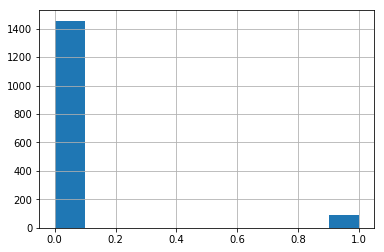

In [70]:
pd.Series(y_pred_prob[:, 1]).hist()

In [71]:
pd.Series(y_pred_prob[:, 1]).unique()

array([0., 1.])

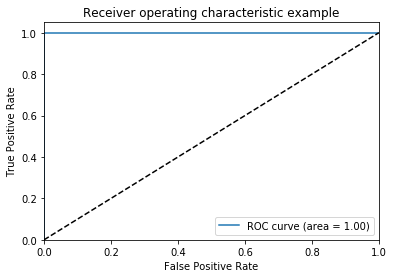

In [72]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()